In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [264]:
metrics = pd.read_csv('models/metrics.csv')
winrates = pd.read_csv('models/winrates.csv')
# decays = pd.read_csv('models/decays.csv', names=['decays'])

In [7]:
rewards_rl = pd.read_csv('rewards_rl.csv', names=['reward'])
rewards_opp = pd.read_csv('rewards_opp.csv', names=['reward'])

In [266]:
metrics.shape, winrates.shape

((1858, 7), (93, 3))

In [267]:
metrics.tail()

,episode,n_agents,value_loss_avg,value_loss_median,action_loss_avg,action_loss_median,reward_avg
1853,1853,1,0.000005,0.000005,0.000016,0.000016,-0.000612
1854,1854,1,0.000004,0.000004,0.000012,0.000012,-0.000756
1855,1855,1,0.000004,0.000004,0.000003,0.000003,-0.000678
1856,1856,1,0.000005,0.000005,0.000005,0.000005,-0.000698
1857,1857,1,0.000005,0.000005,0.000028,0.000028,-0.000942


In [268]:
winrates.tail() 

,episode,vs_random,vs_fixed
88,1760,80.0,0.0
89,1780,90.0,0.0
90,1800,50.0,0.0
91,1820,60.0,0.0
92,1840,80.0,0.0


In [8]:
rewards_rl_no_dubs = rewards_rl.drop_duplicates()
rewards_opp_no_dubs = rewards_opp.drop_duplicates()
rewards_rl.shape, rewards_opp.shape, rewards_rl_no_dubs.shape, rewards_opp_no_dubs.shape

((398, 1), (378, 1), (2, 1), (2, 1))

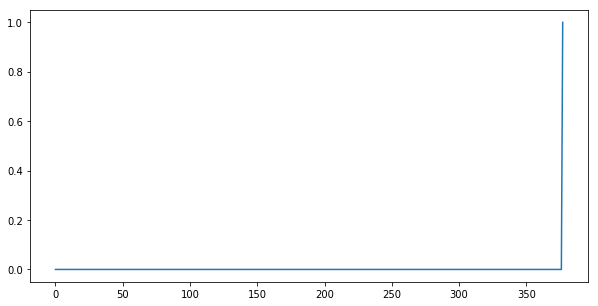

In [9]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp.index, rewards_opp.reward)
plt.show()

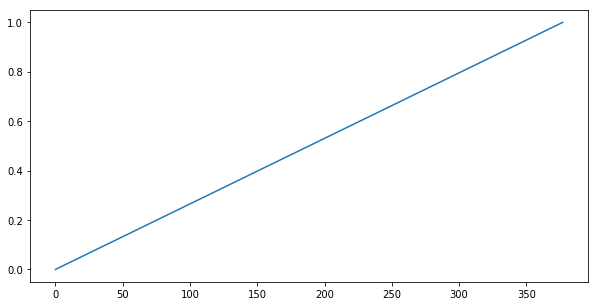

In [10]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp_no_dubs.index, rewards_opp_no_dubs.reward)
plt.show()

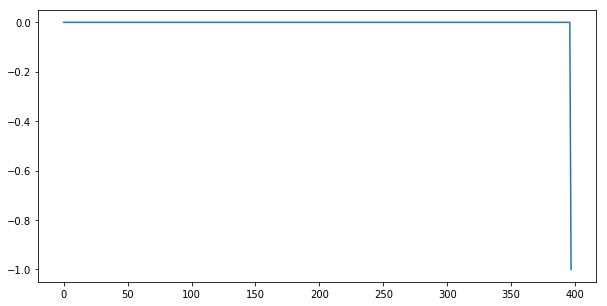

In [11]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl.index, rewards_rl.reward)
plt.show()

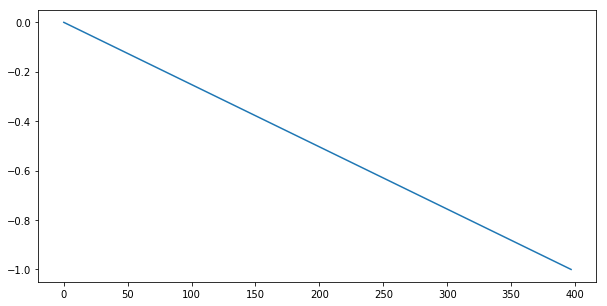

In [12]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl_no_dubs.index, rewards_rl_no_dubs.reward)
plt.show()

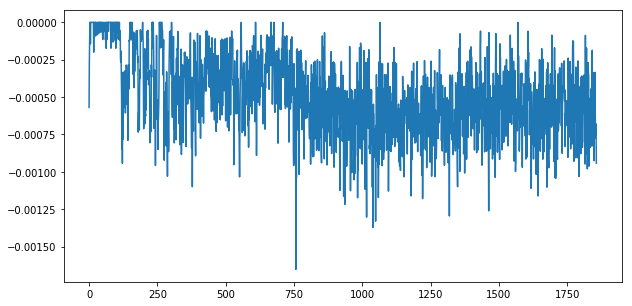

In [274]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.reward_avg)
plt.show()

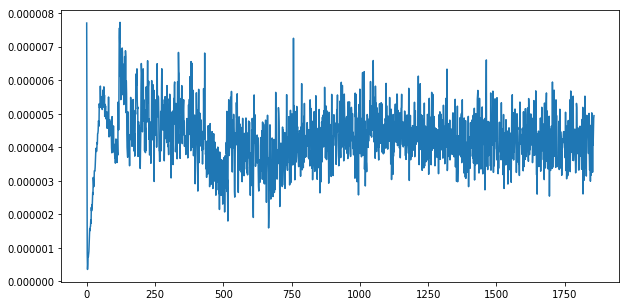

In [275]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.value_loss_avg)
plt.show()

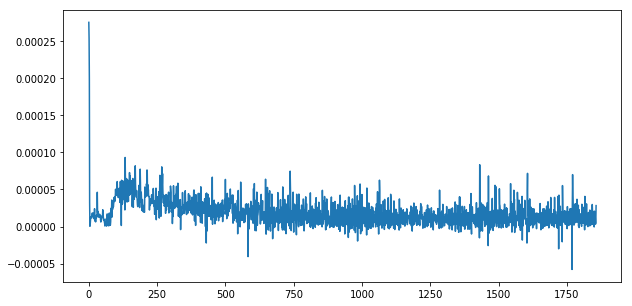

In [276]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.action_loss_avg)
plt.show()

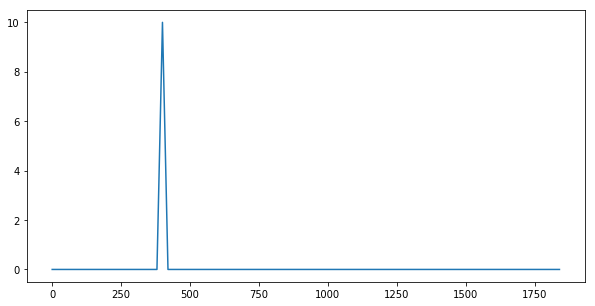

In [277]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_fixed)
plt.show()

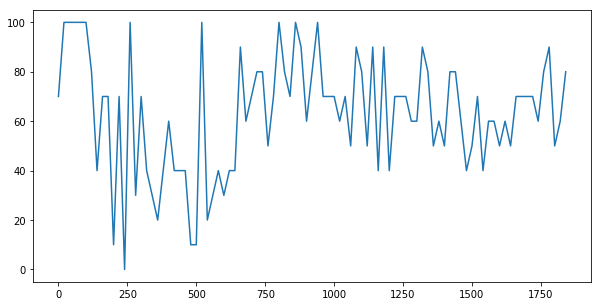

In [278]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_random)
plt.show()

In [279]:
winrates[winrates.vs_fixed == winrates.vs_fixed.max()]

,episode,vs_random,vs_fixed
20,400,60.0,10.0


In [280]:
roll = np.random.choice(np.arange(1, 7), 2)
roll

array([6, 3])

In [53]:
roll

array([6, 1])

In [118]:
rolls = np.array([np.random.choice(np.arange(1, 7), 2) for _ in range(10000)])
with open('rolls.npy', 'wb') as f:
    np.save(f, rolls)

In [111]:
with open('rolls.npy', 'rb') as f:
    rolls1 = np.load(f)

In [119]:
rolls

array([[6, 3],
       [1, 6],
       [1, 6],
       ...,
       [6, 6],
       [6, 3],
       [4, 5]])

In [107]:
rolls1

array([[6, 2],
       [4, 2],
       [2, 1],
       ...,
       [5, 5],
       [5, 4],
       [2, 3]])

In [297]:
import torch.nn.functional as F
import torch

In [305]:
a = torch.FloatTensor([[1.], [0.], [0.], [1.]])
b = torch.FloatTensor([[1.], [0.], [0.], [0.]])

In [306]:
a.unsqueeze(-1)

tensor([[[1.]],

        [[0.]],

        [[0.]],

        [[1.]]])

In [308]:
np.zeros(60)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [301]:
loss = 0.5 * F.cross_entropy(a, b)

RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'target'

In [300]:
loss

tensor(0.1250)

In [4]:
float(False)

0.0